In [1]:
using LinearAlgebra

In [2]:
include("operations.jl")

findmax (generic function with 8 methods)

In [3]:
# Function to compute log-posterior
function 𝓛(θ, Y, H, C₀₀, Cᵥᵥ)  # \bscrl <tab>
    log_likelihood = -0.5 * (Y - H * θ)ᵀ * (Cᵥᵥ)⁻¹ * (Y - H * θ)
    log_prior = -0.5 * (θ)ᵀ * (C₀₀)⁻¹ * θ
    return log_likelihood + log_prior
end

𝓛 (generic function with 1 method)

In [4]:
# Gradient of log-posterior
function ∇ₗₙₚₒₛ(θ, Y, H, C₀₀, Cᵥᵥ)
    ∇ₗₕ = (H)ᵀ * (Cᵥᵥ)⁻¹ * (Y - H * θ)
    ∇ₚᵣᵢ₀ᵣ = -(C₀₀)⁻¹ * θ
    return ∇ₗₕ + ∇ₚᵣᵢ₀ᵣ
end

∇ₗₙₚₒₛ (generic function with 1 method)

In [5]:
# Gradient Descent for MAP estimation
function map_estimator(Y, H, C₀₀, Cᵥᵥ, α=0.01, max_iterations=1000, tolerance=1e-6)
    θ = zeros(m)
    trajectory = []
    
    for iteration in 1:max_iterations
        ∇J = ∇ₗₙₚₒₛ(θ, Y, H, C₀₀, Cᵥᵥ)
        θ -= α * ∇J
        
        push!(trajectory, copy(θ))  # Save the current parameter vector
        
        if norm(∇J) < tolerance
            break
        end
    end
    
    return θ, trajectory
end

map_estimator (generic function with 4 methods)

In [6]:
# Define the Bayesian linear model parameters
n = 100  # Number of observations
m = 3    # Number of parameters

# Generate random data
H = randn(n, m)
C₀₀ = randn(m, m)
Cᵥᵥ = randn(n, n)
θ̄ = randn(m)
Y = H * θ̄ + randn(n);

In [7]:
# Run MAP estimator
estimated_theta_map, trajectory = map_estimator(Y, H, C₀₀, Cᵥᵥ);

In [8]:
# Display the results
println("True Parameter Vector: ", θ̄)
println("MAP Estimator: ", estimated_theta_map)

True Parameter Vector: [2.509579830678415, 1.288385040188874, 0.3728667124174094]
MAP Estimator: [1.1666822649671895, 1.350013279317756, -1.0170338641237482]


In [9]:
using Plots

┌ Warning: Skipped marker arg *.
└ @ Plots ~/.julia/packages/Plots/sxUvK/src/args.jl:1149


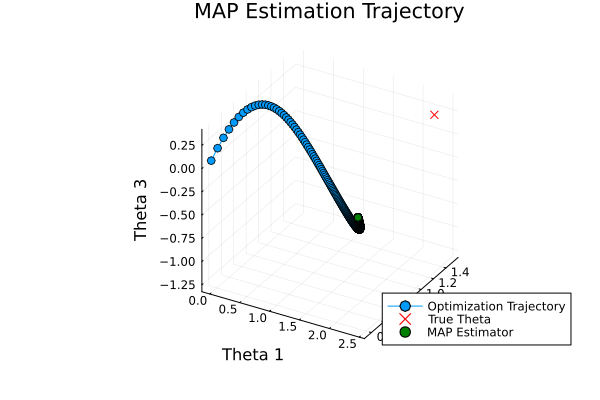

In [10]:
# Plot the optimization trajectory
plot(
    [theta[1] for theta in trajectory],
    [theta[2] for theta in trajectory],
    [theta[3] for theta in trajectory],
    marker = :o,
    label = "Optimization Trajectory",
    xlabel = "Theta 1",
    ylabel = "Theta 2",
    zlabel = "Theta 3",
    title = "MAP Estimation Trajectory"
)
scatter!([θ̄[1]], [θ̄[2]], [θ̄[3]], marker = :x, label = "True Theta", color = :red)
scatter!([estimated_theta_map[1]], [estimated_theta_map[2]], [estimated_theta_map[3]], marker = :*, label = "MAP Estimator", color = :green)
